(unit4.7)=
# Unit 4.7: Transfer Functions for Circuit Analysis

The preparatory reading for this section is [Chapter 4.4](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=75#ppg=113) {cite}`karris` which discusses transfer function models of electrical circuits. We have also adapted content from [3.6 The System Function](https://www.accessengineeringlibrary.com/content/book/9781260454246/toc-chapter/chapter3/section/section28) from {cite}`schaum`.

Follow along at [cpjobling.github.io/eg-150-textbook/laplace_transform/7/tf_for_circuits](https://cpjobling.github.io/eg-150-textbook/laplace_transform/7/tf_for_circuits)

![QR Code for this lecture](pictures/qrcode_laplace7.png)

## Agenda

In this unit, we will explore how transfer functions introduced in {ref}`unit4.6` can be applied to the analysis of circuits.

* {ref}`circ_tf`
* {ref}`examples14`

In [1]:
% Initialize MATLAB
clearvars
cd ../matlab 
pwd
format compact


ans =

    '/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab'



(circ_tf)=
## Transfer Functions for Circuits

When doing circuit analysis with components defined in the complex frequency domain, the ratio of the output voltage $V_{\mathrm{out}}(s)$ to the input voltage $V_{\mathrm{in}}(s)$ *under zero initial conditions* is of great interest.

This ratio is known as the *voltage transfer function* denoted $G_v(s)$:

$$G_v(s) = \frac{V_{\mathrm{out}}(s)}{V_{\mathrm{in}}(s)}$$

Similarly, the ratio of the output current $I_{\mathrm{out}}(s)$ to the input current $I_{\mathrm{in}}(s)$ *under zero initial conditions*, is called the *current transfer function* denoted $G_i(s)$:

$$G_i(s) = \frac{I_{\mathrm{out}}(s)}{I_{\mathrm{in}}(s)}$$

In practice, the current transfer function is rarely used, so we will use the voltage transfer function denoted:

$$G(s) = \frac{V_{\mathrm{out}}(s)}{V_{\mathrm{in}}(s)}$$

#### (examples14)=
## Examples 14

We will work through these and demonstrate the MATLAB solutions in class.

### Example 14.1

Derive an expression for the transfer function $G(s)$ for the circuit shown in {numref}`fig:ex14.1`. 

In this circuit $R_g$ represents the internal resistance of the applied (voltage) source $v_s$, and $R_L$ represents the resistance of the load that consists of $R_L$, $L$ and $C$.

:::{figure-md} Fig:ex14.1
<img src="pictures/Example6.png" alt="Circuit for Example 14.1" width="50%">

Circuit for Example 14.1
:::

#### Sketch of Solution for Example 14.1

* Replace $v_s(t)$, $R_g$, $R_L$, $L$ and $C$ by their transformed (*complex frequency*) equivalents: $V_s(s)$, $R_g$, $R_L$, $sL$ and $1/(sC)$

* Use the *Voltage Divider Rule* to determine $V_\mathrm{out}(s)$ as a function of $V_s(s)$

* Form $G(s)$ by writing down the ratio $V_\mathrm{out}(s)/V_s(s)$

Switch to virtual whiteboard in OneNote.

<pre style="border: 2px solid blue">
Solve in OneNote


























</pre>

#### Worked solution for Example 14.1

Pencast: [ex6.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/ex6.pdf) - open in Adobe Acrobat Reader.

#### Answer for Example 14.1

$$G(s) = \frac{V_\mathrm{out}(s)}{V_s(s)} = \frac{R_L + sL + 1/sC}{R_g + R_L + sL + 1/sC}.$$

### Example 14.2

Compute the transfer function for the op-amp circuit shown in {numref}`fig:ex14.2` in terms of the circuit constants $R_1$, $R_2$, $R_3$, $C_1$ and $C_2$.

:::{figure-md} Fig:ex14.2
<img src="pictures/example7.png" alt="OpAmp circuit for Example 14.2" width="60%">

OpAmp circuit for Example 14.2
:::

Then replace the complex variable $s$ with $j\omega$, and the circuit constants with their numerical values and plot the magnitude

$$\left|G(j\omega)\right| = \frac{\left|V_{\mathrm{out}}(j\omega)\right|}{\left|V_{\mathrm{in}}(j\omega)\right|}$$

versus radian frequency $\omega$ rad/s.

#### Sketch of Solution for Example 14.2

* Replace the components and voltages in the circuit diagram with their complex frequency equivalents

* Use nodal analysis to determine the voltages at the nodes either side of the 50K resistor $R_3$

#### Sketch of Solution for Example 14.2 (continued)

* Note that the voltage at the input to the op-amp is a virtual ground

* Solve for $V_{\mathrm{out}}(s)$ as a function of $V_{\mathrm{in}}(s)$

* Form the reciprocal $G(s) = V_{\mathrm{out}}(s)/V_{\mathrm{in}}(s)$

Switch to virtual whiteboard in OneNote.

<pre style="border: 2px solid blue">
Solve in OneNote






































</pre>

#### Answer for Example 14.2

$$G(s) = \frac{V_\mathrm{out}(s)}{V_\mathrm{in}(s)} = \frac{-1}{R_1\left(\left(1/R_1 + 1/R_2 + 1/R_3 + sC_1\right)\left(sC_2R_3\right)+1/R_2\right)}.$$ (ex:14.2)

#### Worked solution for Example 14.2

Pencast: [ex7.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/ex7.pdf) - open in Adobe Acrobat Reader.

#### Sketch of Solution for Example 14.2 (continued)

* Use MATLAB to calculate the component values, then replace $s$ by $j\omega$.

* Compute $\left|G(j\omega)\right|$ and plot on log-linear "paper".

#### The Matlab Bit

Set up the symbols we will be using. In this case just the Laplace complex frequency $s$.

In [2]:
syms s

Now define the values of the components

In [3]:
R1 = 200*10^3; 
R2 = 40*10^3;
R3 = 50*10^3;

C1 = 25*10^(-9);
C2 = 10*10^(-9);

Define the transfer function derived from analysis (Eq. {eq}`eg:ex14.2`)

In [4]:
den = R1*((1/R1+ 1/R2 + 1/R3 + s*C1)*(s*R3*C2) + 1/R2)

den =


100*s*((7555786372591433*s)/302231454903657293676544 + 1/20000) + 5


Simplify coefficients of $s$ in the denominator. Note `sym2poly` converts a symbolic polynomial with numerical coeficients into a MATLAB polynomial.

In [5]:
format long
denG = sym2poly(den)

denG =
   0.000002500000000   0.005000000000000   5.000000000000000


Now define the denominator

In [6]:
numG = -1;

**Plot the frequency response**

For convenience, define coefficients $a$ and $b$:

In [7]:
a = denG(1);
b = denG(2);

$$G(j\omega) = \frac{-1}{a\omega^2 - jb\omega + 5}$$

In [8]:
w = 1:10:10000;
Gw = -1./(a*w.^2 - j.*b.*w + denG(3));

Plot $|G(j\omega)|$ against $\omega$ on log-lin "graph paper".

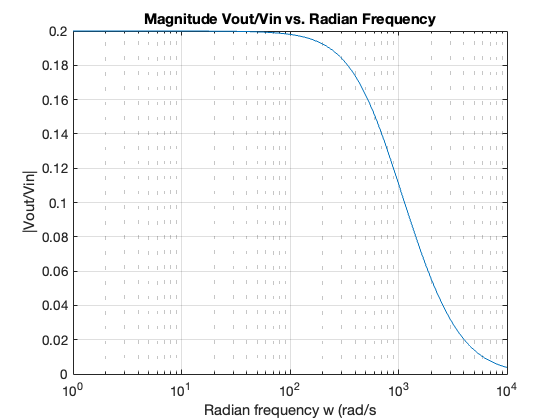

In [9]:
semilogx(w, abs(Gw))
xlabel('Radian frequency w (rad/s')
ylabel('|Vout/Vin|')
title('Magnitude Vout/Vin vs. Radian Frequency')
grid

Note that this is a low-pass filter. Sinusoids at low frequencies are passed with a gain of 0.2. For frequencies above around 100 ra/s, the filter starts to reduce the attenuation of the passed signal. At 10,000 rad/s, the attenuation is 1/10 of the attenuation at 1 rad/s.

## Summary

In this unit, we will explored how transfer functions introduced in {ref}`unit4.6` can be applied to the analysis of circuits.

* {ref}`circ_tf`
* {ref}`examples14`

### Take Away

The ratio of the output voltage  $V_\mathrm{out}(s)$ to the input voltage $V_\mathrm{in}(s)$ under zero initial conditions is of great interest. We call this ratio the *voltage transfer function*

$$G_v(s) = \frac{V_\mathrm{out}(s)}{V_\mathrm{in}(s)}$$

We can consider other ratios such as the *current transfer function*

$$G_i(s) = \frac{I_\mathrm{out}(s)}{I_\mathrm{in}(s)}$$

but in practice this is rarely used.

## Next time

We explore the facilties provided by other toolboxes in MATLAB, most notably the *Control Systems Toolbox* and the simulation tool Simulink in {ref}`unit4.8`. We will also look at some of the problems you have studied in **EG-152 Analogue Design** hopefully confirming some of the results you have obbserved in the lab.

* {ref}`unit4.8`

## References

```{bibliography}
:filter: docname in docnames
```

## Matlab Solutions

For convenience, single script MATLAB solutions to the examples are provided and can be downloaded from the accompanying [MATLAB](https://github.com/cpjobling/eg-150-textbook/tree/master/laplace_transform/matlab) folder.

* {ref}`ex:14.2` [[example_14.2.mlx](https://cpjobling.github.io/eg-150-textbook/laplace_transform/matlab/example_14.2.mlx)]